# SVM (classification of digits)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
df = datasets.load_digits()

In [ ]:
df

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [ ]:
df.data.shape

(1797, 64)

In [ ]:
df.feature_names

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

In [ ]:
dir(df) #directory

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [ ]:
df = pd.DataFrame(df.data ,columns = df.feature_names)

In [ ]:
print(df.head(3))

   pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
0        0.0        0.0        5.0       13.0        9.0        1.0   
1        0.0        0.0        0.0       12.0       13.0        5.0   
2        0.0        0.0        0.0        4.0       15.0       12.0   

   pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_6  pixel_6_7  \
0        0.0        0.0        0.0        0.0  ...        0.0        0.0   
1        0.0        0.0        0.0        0.0  ...        0.0        0.0   
2        0.0        0.0        0.0        0.0  ...        5.0        0.0   

   pixel_7_0  pixel_7_1  pixel_7_2  pixel_7_3  pixel_7_4  pixel_7_5  \
0        0.0        0.0        6.0       13.0       10.0        0.0   
1        0.0        0.0        0.0       11.0       16.0       10.0   
2        0.0        0.0        0.0        3.0       11.0       16.0   

   pixel_7_6  pixel_7_7  
0        0.0        0.0  
1        0.0        0.0  
2        9.0        0.0  

[3 rows x 64 columns

In [ ]:
# Load the dataset
df = datasets.load_digits()

# Create a DataFrame with both features and target
df = pd.DataFrame(data=df.data, columns=df.feature_names)
df['target'] = datasets.load_digits().target # Add the target column separately

# Now you can access df.target
og = df.target
df['target'] = og

df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [ ]:
#df.target_names


In [ ]:
X = df.values.reshape((len(df),-1))  # Use df.values
Y = df.target

In [ ]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size =0.2 , random_state =42)

In [ ]:
svm = SVC(kernel ='rbf', gamma= 0.01 , C= 21)
svm.fit(X_train,Y_train)

SVC(C=21, gamma=0.01)

In [ ]:
svm.score(X_train,Y_train)

1.0

In [ ]:
y_pred = svm.predict(X_test)

In [ ]:
svm.score(X_test,Y_test)

0.8138888888888889

In [ ]:
cm =confusion_matrix(Y_test,y_pred)
print(cm)

[[20  0  0  0  0  0  0  0 13  0]
 [ 0 25  0  0  0  0  0  0  3  0]
 [ 0  0 25  0  0  0  0  0  8  0]
 [ 0  0  0 27  0  0  0  0  7  0]
 [ 0  0  0  0 38  0  0  0  8  0]
 [ 0  0  0  0  0 38  0  0  9  0]
 [ 0  0  0  0  0  0 31  0  4  0]
 [ 0  0  0  0  0  0  0 27  7  0]
 [ 0  0  0  0  0  0  0  0 30  0]
 [ 0  0  0  0  0  0  0  0  8 32]]


In [ ]:
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(Y_test, y_pred))


Accuracy: 81.39%
              precision    recall  f1-score   support

           0       1.00      0.61      0.75        33
           1       1.00      0.89      0.94        28
           2       1.00      0.76      0.86        33
           3       1.00      0.79      0.89        34
           4       1.00      0.83      0.90        46
           5       1.00      0.81      0.89        47
           6       1.00      0.89      0.94        35
           7       1.00      0.79      0.89        34
           8       0.31      1.00      0.47        30
           9       1.00      0.80      0.89        40

    accuracy                           0.81       360
   macro avg       0.93      0.82      0.84       360
weighted avg       0.94      0.81      0.85       360



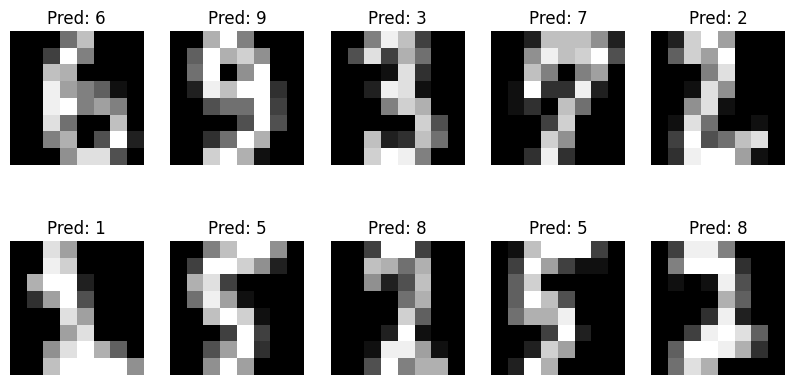

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    # Reshape to (8, 8) using the first 64 elements
    reshaped_image = X_test[i][:64].reshape(8, 8)
    ax.imshow(reshaped_image, cmap='gray')
    ax.set_title(f"Pred: {y_pred[i]}")
    ax.axis('off')
plt.show()

# SVM(Financial fraud detection)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
df = pd.read_csv('/content/credit_card_fraud_dataset.csv')

In [ ]:
df.head()

,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
0,1,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0
1,2,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0
2,3,2024-01-08 10:08:35.462834,784.00,394,purchase,New York,0
3,4,2024-04-13 23:50:35.462850,3514.40,944,purchase,Philadelphia,0
4,5,2024-07-12 18:51:35.462858,369.07,475,purchase,Phoenix,0


In [ ]:
df.isnull().sum()

,0
TransactionID,0
TransactionDate,0
Amount,0
MerchantID,0
TransactionType,0
Location,0
IsFraud,0


In [ ]:
from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder,OrdinalEncoder


le = LabelEncoder()

df.TransactionType = le.fit_transform(df[['TransactionType']])

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
on = OneHotEncoder(sparse_output =False)

df.Location = on.fit_transform(df[['Location']])
Location_name = on.get_feature_names_out(['Location'])
Location_no =pd.DataFrame(df.Location, columns = Location_name,index =df.index)
df = pd.concat([df,Location_no],axis =1)
df.drop('Location',axis =1 , inplace =True)

In [ ]:
df.head()

,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,IsFraud,Location_Chicago,Location_Dallas,Location_Houston,Location_Los Angeles,Location_New York,Location_Philadelphia,Location_Phoenix,Location_San Antonio,Location_San Diego,Location_San Jose
0,1,2024-04-03 14:15:35.462794,4189.27,688,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2024-03-19 13:20:35.462824,2659.71,109,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2024-01-08 10:08:35.462834,784.00,394,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2024-04-13 23:50:35.462850,3514.40,944,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2024-07-12 18:51:35.462858,369.07,475,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


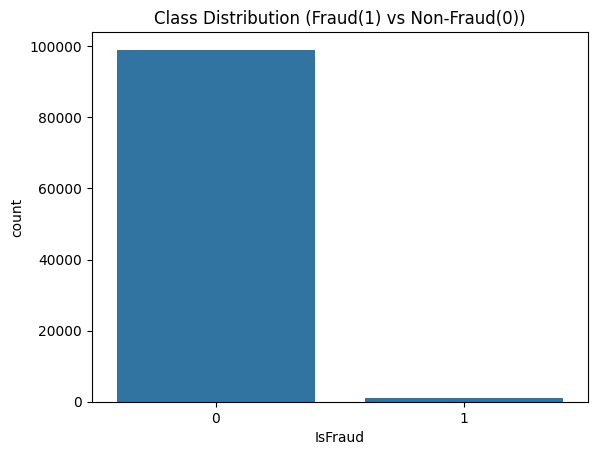

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#Check for class imbalance
sns.countplot(x=df["IsFraud"])
plt.title("Class Distribution (Fraud(1) vs Non-Fraud(0))")
plt.show()

In [ ]:
'''Fraud cases are very few compared to non-fraud cases.
We will handle this imbalance using undersampling or SMOTE.'''

X= df.drop( 'IsFraud', axis =1)
Y= df['IsFraud']



In [ ]:
X['TransactionDate'] = pd.to_datetime(X['TransactionDate'])

# Extract numerical features from the datetime objects (e.g., Unix timestamp)
# Replace 'TransactionDate' column with numerical representation
# For example: X['TransactionDate'] = X['TransactionDate'].astype(np.int64) // 10**9  # to seconds

# Extract numerical features (e.g., hour, day, month)
X['TransactionHour'] = X['TransactionDate'].dt.hour
X['TransactionDay'] = X['TransactionDate'].dt.day
X['TransactionMonth'] = X['TransactionDate'].dt.month
# ... extract other relevant features ...
X = X.drop('TransactionDate', axis=1)


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='constant', fill_value=0)  # Choose a strategy (mean, median, most_frequent)
X = imputer.fit_transform(X)


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:572: FutureWarning: Currently, when `keep_empty_feature=False` and `strategy="constant"`, empty features are not dropped. This behaviour will change in version 1.8. Set `keep_empty_feature=True` to preserve this behaviour.
  warnings.warn(


In [ ]:
#Handle class imbalance using undersampling
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=0.1, random_state=42)  # Keep 10% fraud samples
X_resampled, y_resampled = rus.fit_resample(X, Y)


In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X_resampled,y_resampled,test_size =0.2 , random_state =42)

In [ ]:
svm = SVC(kernel ='rbf', gamma= 0.01 , C= 21)
svm.fit(X_train,Y_train)

SVC(C=21, gamma=0.01)

In [ ]:
test_score = svm.score(X_test,Y_test)
print(f"Test Score: {test_score * 100:.2f}%")

Test Score: 90.32%


In [ ]:
train_score = svm.score(X_train,Y_train)
print(f"Train Score: {train_score * 100:.2f}%")

Train Score: 100.00%


In [ ]:
Y_pred =svm.predict(X_test)

In [ ]:
cm =confusion_matrix(Y_test,Y_pred)
print(cm)

[[1987    0]
 [ 213    0]]


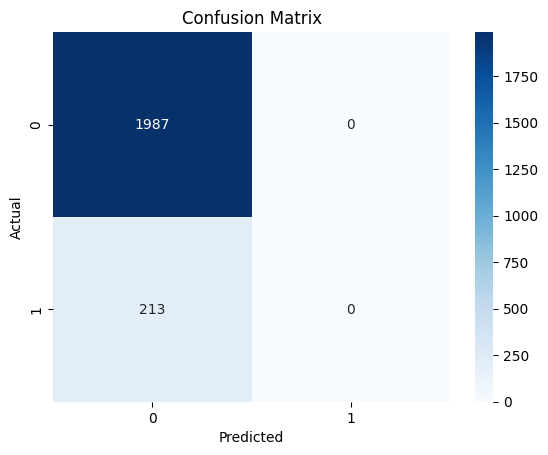

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# Classification Report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1987
           1       0.00      0.00      0.00       213

    accuracy                           0.90      2200
   macro avg       0.45      0.50      0.47      2200
weighted avg       0.82      0.90      0.86      2200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.01, 0.1],
    'kernel': ['rbf']
}
# Grid search
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10],
                         'gamma': ['scale', 'auto', 0.01, 0.1],
                         'kernel': ['rbf']},
             scoring='recall')

In [ ]:
# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Train with best params
best_svm = grid_search.best_estimator_
Y_pred_best = best_svm.predict(X_test)

# Evaluate best model
print(classification_report(Y_test, Y_pred_best))

Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1987
           1       0.00      0.00      0.00       213

    accuracy                           0.90      2200
   macro avg       0.45      0.50      0.47      2200
weighted avg       0.82      0.90      0.86      2200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
svm = SVC(kernel ='rbf', gamma= 'scale' , C= 0.1)
svm.fit(X_train,Y_train)

SVC(C=0.1)

In [ ]:
y_pred = svm.predict(X_test)
cm =confusion_matrix(Y_test,y_pred)
print(cm)

[[1987    0]
 [ 213    0]]


In [ ]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1987
           1       0.00      0.00      0.00       213

    accuracy                           0.90      2200
   macro avg       0.45      0.50      0.47      2200
weighted avg       0.82      0.90      0.86      2200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
